<a href="https://colab.research.google.com/github/v-demydchenko/Python-for-DA/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D1%83%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F_%D0%BA%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B8%D0%B7%D0%B8%D0%BA%D1%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Прогнозування кредитного ризику

## Мета завдання
Застосувати знання з лекції для побудови моделі логістичної регресії, що прогнозує ймовірність дефолту за кредитом, іншими словами, що людина не поверне кредит. Ви пройдете весь цикл: від дослідницького аналізу до оцінки якості класифікаційної моделі.

## Опис датасету
**Credit Risk Dataset** містить інформацію про 32,000+ позичальників з такими параметрами:
- **person_age**: Вік позичальника
- **person_income**: Річний дохід
- **person_home_ownership**: Тип володіння житлом
- **person_emp_length**: Стаж роботи (в роках)
- **loan_intent**: Мета кредиту
- **loan_grade**: Кредитний рейтинг (A - кращий, F - гірший)
- **loan_amnt**: Сума кредиту
- **loan_int_rate**: Процентна ставка
- **loan_status**: Статус кредиту (0 = сплачено, 1 = дефолт) - **цільова змінна**
- **loan_percent_income**: Відношення кредиту до доходу
- **cb_person_default_on_file**: Історія дефолтів (Y/N)
- **cb_person_cred_hist_length**: Довжина кредитної історії

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `credit_risk_dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (кількість записів, типи колонок)
5. Перевірте розподіл цільової змінної (відсотк даних для кожного класу)

Дайте висновок, це задача збалансованої чи незбалансованої класифікації.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_risk_dataset.csv', sep=None, engine='python')

In [7]:
df.shape

(32581, 12)

In [8]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [9]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
df.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64



---

## Завдання 2: Дослідницький аналіз даних (EDA) (4 бали)

**Що потрібно зробити:**
1. Обчисліть відсоток пропущених значень в колонках. За наявності пропущених значень - заповніть їх медіаною для числових колонок і найбільш частим значеннмя для категоріальних.
2. Проаналізуйте розподіл числових змінних.
3. Знайдіть та обробіть викиди в колонці person_income з допомогою [Interquartile range](https://uk.wikipedia.org/wiki/%D0%9C%D1%96%D0%B6%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D0%BB%D1%8C%D0%BD%D0%B8%D0%B9_%D1%80%D0%BE%D0%B7%D0%BC%D0%B0%D1%85).
4. Проаналізуйте категоріальні змінні відносно цільової та частоту зустрічання різних значень в них.
5. Візуалізуйте взаємозв'язок ознак з цільовою змінною.


In [18]:
# 1
missing_percent = df.isnull().mean() * 100
print("Відсоток пропусків у колонках:\n",missing_percent)

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ["int64", "float64"]:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

Відсоток пропусків у колонках:
 person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64


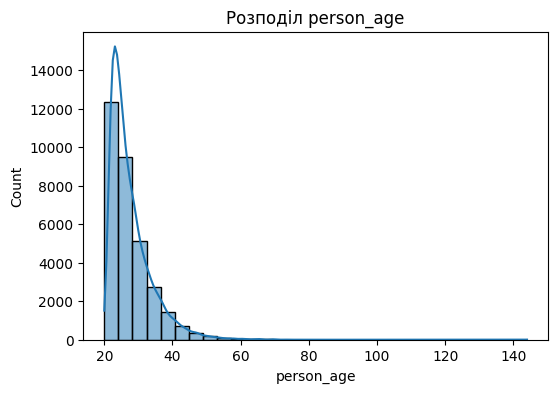

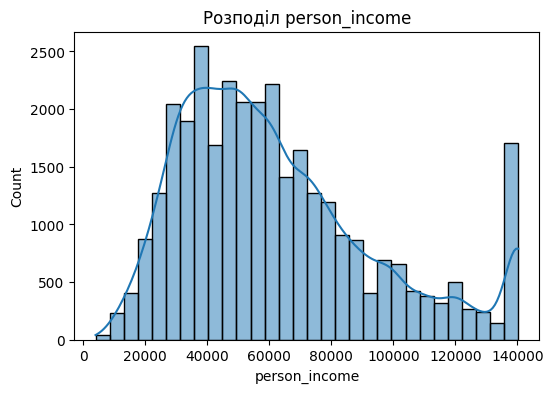

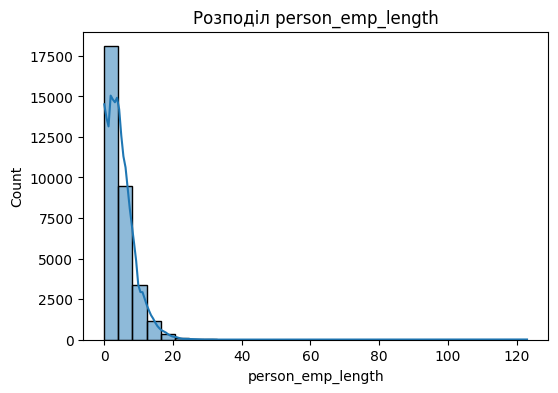

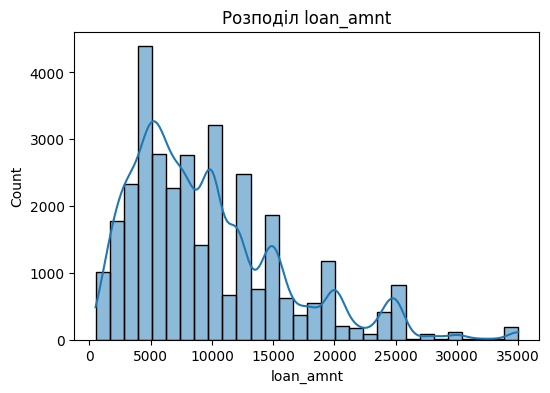

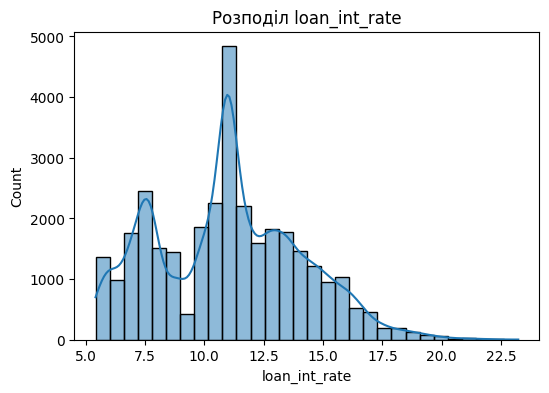

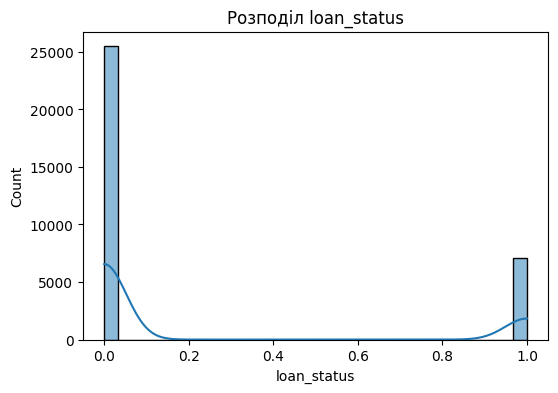

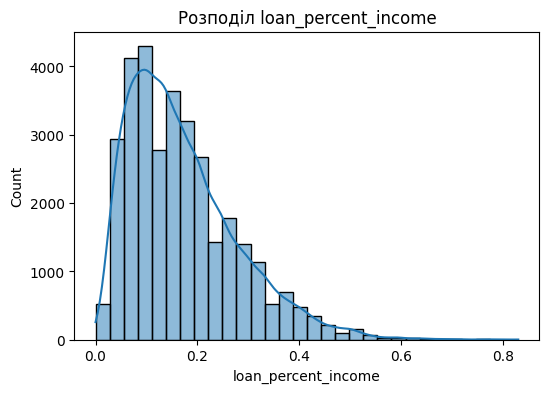

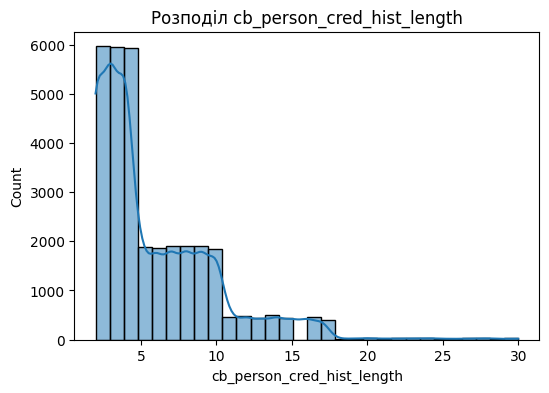

In [19]:
# 2
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Розподіл {col}")
    plt.show()

Межі для викидів у доході: -22550.0 - 140250.0

person_home_ownership - розподіл значень:
person_home_ownership
RENT        50.477272
MORTGAGE    41.263313
OWN          7.931003
OTHER        0.328412
Name: proportion, dtype: float64


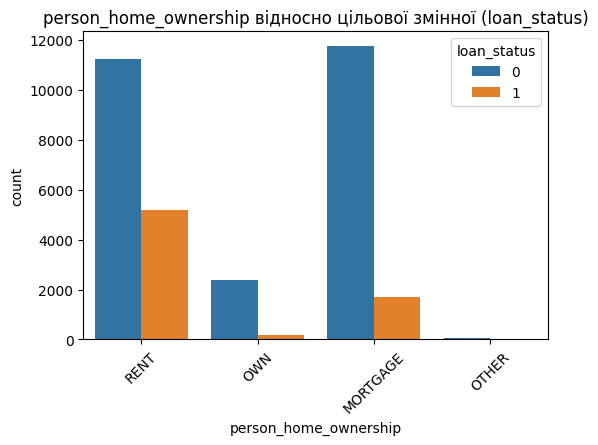


loan_intent - розподіл значень:
loan_intent
EDUCATION            19.806022
MEDICAL              18.633559
VENTURE              17.553175
PERSONAL             16.945459
DEBTCONSOLIDATION    15.997053
HOMEIMPROVEMENT      11.064731
Name: proportion, dtype: float64


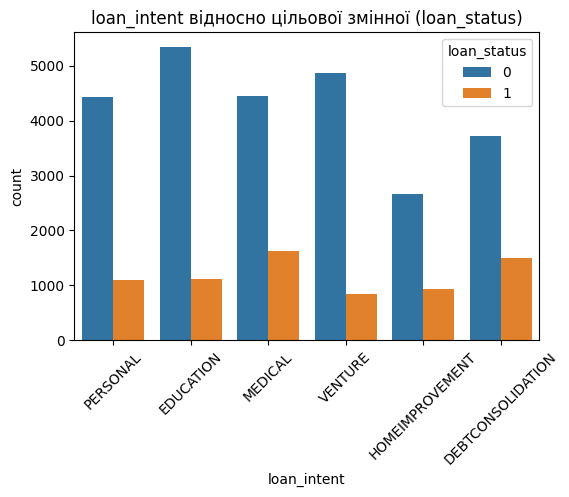


loan_grade - розподіл значень:
loan_grade
A    33.077561
B    32.076977
C    19.821368
D    11.129186
E     2.958780
F     0.739695
G     0.196434
Name: proportion, dtype: float64


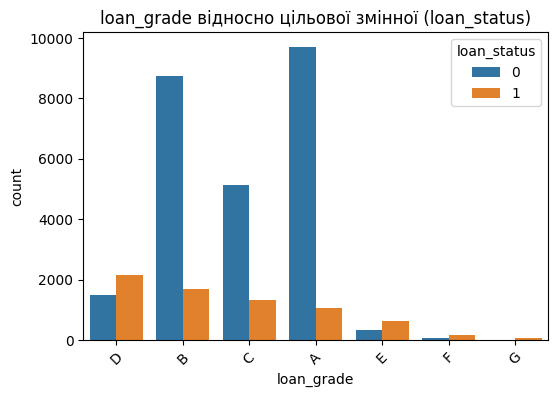


cb_person_default_on_file - розподіл значень:
cb_person_default_on_file
N    82.367024
Y    17.632976
Name: proportion, dtype: float64


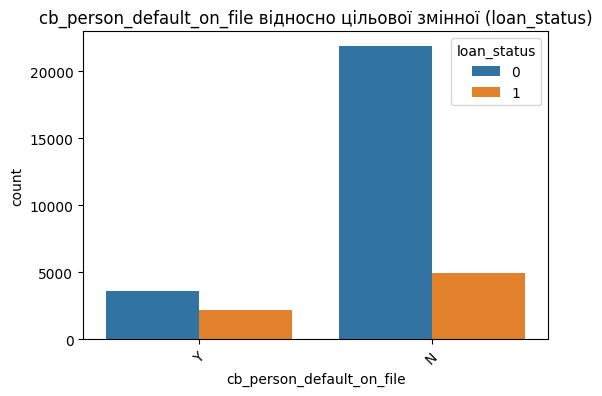

In [21]:
# 3
Q1 = df["person_income"].quantile(0.25)
Q3 = df["person_income"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f"Межі для викидів у доході: {lower} - {upper}")

df["person_income"] = np.where(df["person_income"] > upper, upper,
                        np.where(df["person_income"] < lower, lower, df["person_income"]))

# 4
cat_cols = df.select_dtypes(exclude=[np.number]).columns

for col in cat_cols:
    print(f"\n{col} - розподіл значень:")
    print(df[col].value_counts(normalize=True) * 100)

    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, hue="loan_status")
    plt.title(f"{col} відносно цільової змінної (loan_status)")
    plt.xticks(rotation=45)
    plt.show()

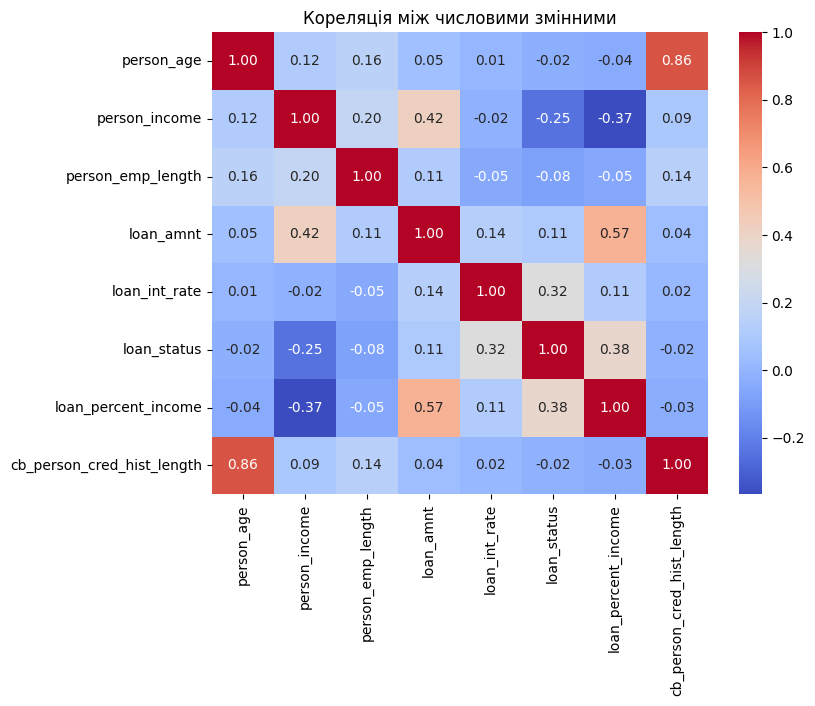

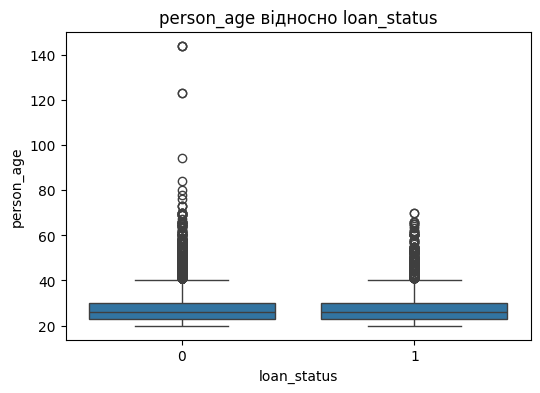

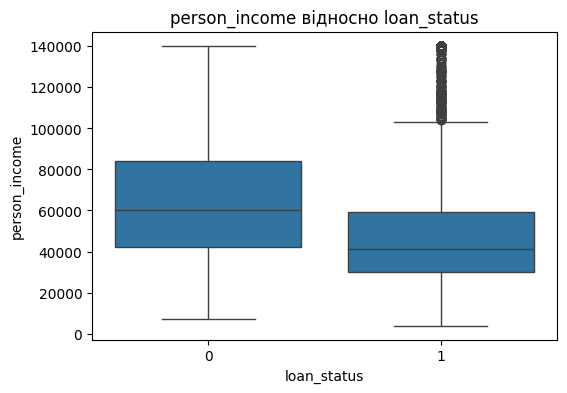

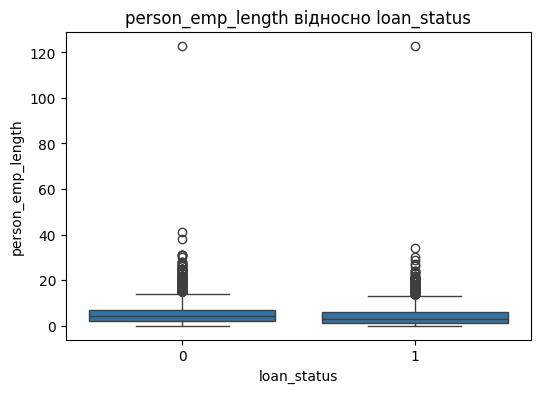

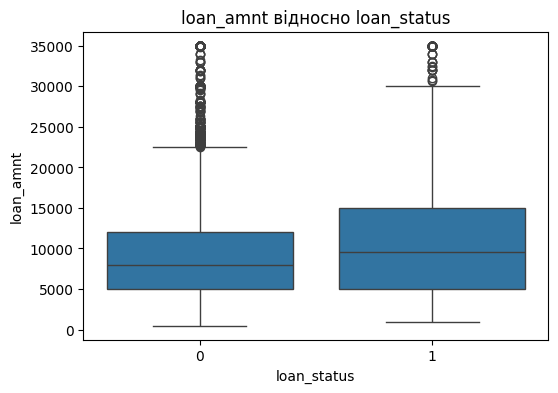

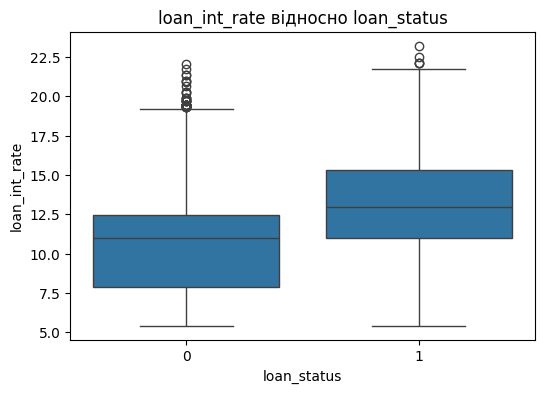

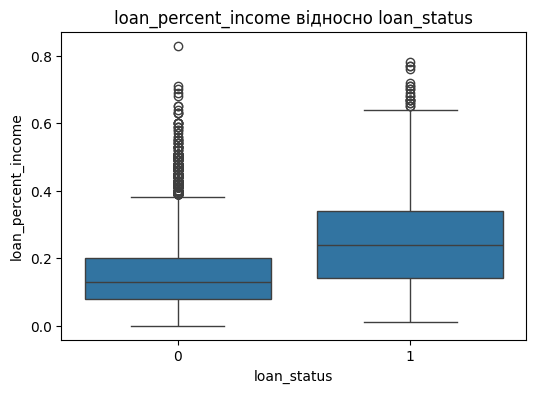

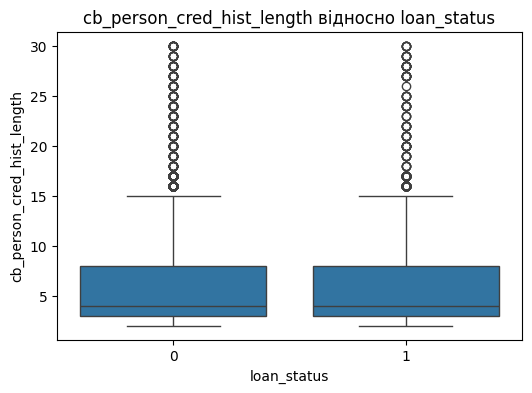

In [22]:
# 5
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляція між числовими змінними")
plt.show()

# Boxplot
for col in numeric_cols:
    if col != "loan_status":
        plt.figure(figsize=(6, 4))
        sns.boxplot(x="loan_status", y=col, data=df)
        plt.title(f"{col} відносно loan_status")
        plt.show()


---

## Завдання 3: Аналіз кореляцій та Feature Engineering (3 бали)

**Що потрібно зробити:**
1. Побудуйте матрицю кореляцій для числових змінних.
2. Закодуйте категоріальні змінні.
3. Виберіть фінальний набір ознак, можна лишити всі, якщо ви вважаєте, що це - доцільно.



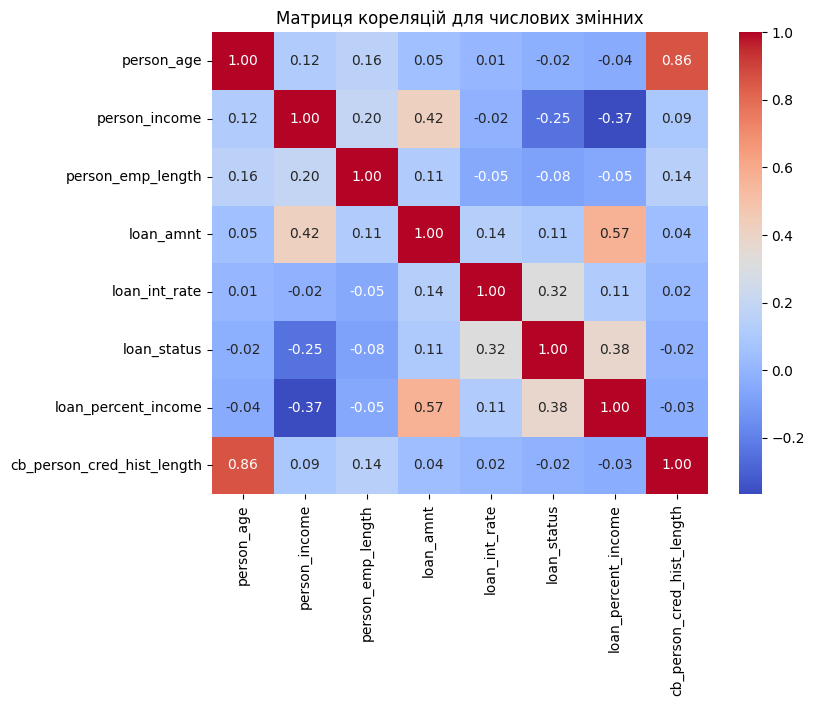

In [23]:
# 1 Матриця кореляцій
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матриця кореляцій для числових змінних")
plt.show()

In [24]:
# 2 Кодування категоріальних змінних
cat_cols = df.select_dtypes(exclude=[np.number]).columns
print("Категоріальні змінні:", list(cat_cols))

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

Категоріальні змінні: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [25]:
# 3 Фінальний набір ознак
X = df_encoded.drop("loan_status", axis=1)
y = df_encoded["loan_status"]

print("Форма фінального набору ознак:", X.shape)
print("Форма цільової змінної:", y.shape)

Форма фінального набору ознак: (32581, 22)
Форма цільової змінної: (32581,)



---

## Завдання 4: Підготовка даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на X та y
2. Поділіть на навчальну та тестову вибірки
3. Застосуйте масштабування
4. Навчіть модель логістичної регресії
5. Зробіть прогнози на тренувальній та тестовій вибірках.



In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1
cat_cols = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

X = df.drop("loan_status", axis=1)
y = df["loan_status"]

print("Типи колонок у X:\n", X.dtypes.value_counts())

Типи колонок у X:
 bool       15
float64     4
int64       3
Name: count, dtype: int64


In [41]:
# 2. Поділ на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [35]:
# 3. Масштабування
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# 4. Навчання моделі
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [40]:
# 5. Прогнози
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("Точність на train:", accuracy_score(y_train, y_train_pred))
print("Точність на test:", accuracy_score(y_test, y_test_pred))

print("\nClassification report (test):\n", classification_report(y_test, y_test_pred))

Точність на train: 0.8666743400859422
Точність на test: 0.8669633266840571

Classification report (test):
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      5095
           1       0.77      0.56      0.65      1422

    accuracy                           0.87      6517
   macro avg       0.83      0.76      0.78      6517
weighted avg       0.86      0.87      0.86      6517




---

## Завдання 5: Оцінка якості моделі (4 бали)

**Що потрібно зробити:**
1. Побудуйте confusion matrix.
2. Обчисліть основні метрики (accuracy, precision, recall, f1).
3. Побудуйте ROC-криву та обчисліть AUC
4. Проаналізуйте важливість ознак.
5. Зробіть висновки про якість моделі та які ознаки найбільше впливають на прогноз.


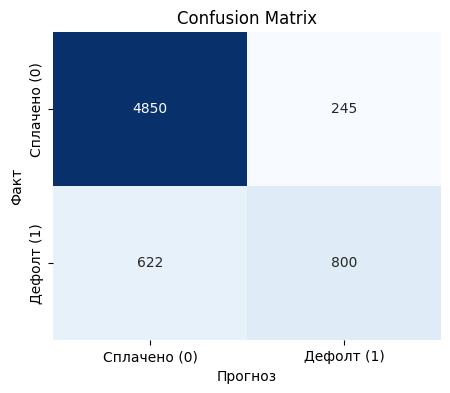

In [46]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score, classification_report
)

# 1. Confusion Matrix
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Сплачено (0)", "Дефолт (1)"],
            yticklabels=["Сплачено (0)", "Дефолт (1)"])
plt.xlabel("Прогноз")
plt.ylabel("Факт")
plt.title("Confusion Matrix")
plt.show()

In [47]:
# 2. Метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1-score:", round(f1, 3))

Accuracy: 0.867
Precision: 0.766
Recall: 0.563
F1-score: 0.649


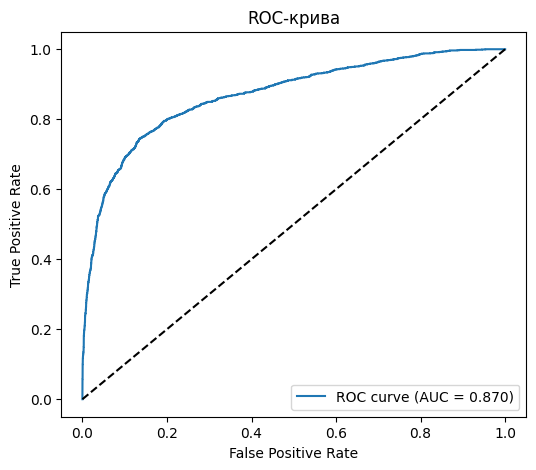

AUC: 0.87


In [48]:
# 3. ROC-крива та AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-крива")
plt.legend(loc="lower right")
plt.show()

print("AUC:", round(auc, 3))


Топ-10 важливих ознак:
                       Feature  Coefficient
5          loan_percent_income     1.254270
17                loan_grade_D     0.822317
18                loan_grade_E     0.481755
3                    loan_amnt    -0.467390
8    person_home_ownership_OWN    -0.445162
9   person_home_ownership_RENT     0.420598
14         loan_intent_VENTURE    -0.411387
10       loan_intent_EDUCATION    -0.319694
19                loan_grade_F     0.282783
20                loan_grade_G     0.273675


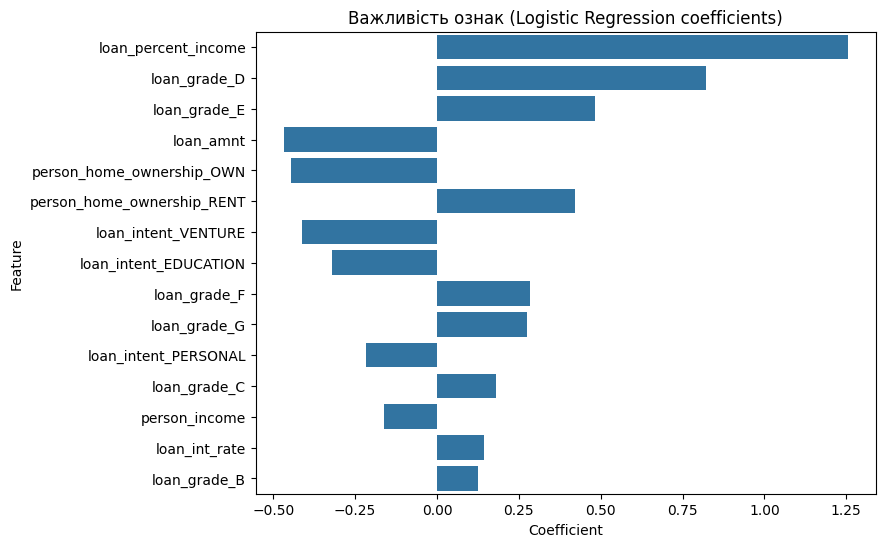

In [49]:
# 4. Важливість ознак
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("\nТоп-10 важливих ознак:")
print(feature_importance.head(10))

plt.figure(figsize=(8, 6))
sns.barplot(x="Coefficient", y="Feature", data=feature_importance.head(15))
plt.title("Важливість ознак (Logistic Regression coefficients)")
plt.show()

In [51]:
# 5. Висновки
print("ВИСНОВКИ:")
print("Accuracy показує загальну точність класифікації.")
print("Precision — частка правильних прогнозів дефолту серед усіх передбачених дефолтів.")
print("Recall — наскільки добре модель знаходить справжніх дефолтників.")
print("F1 — баланс між precision та recall.")
print("AUC показує якість розділення класів: >0.7 добре, >0.8 дуже добре.")
print("З коефіцієнтів видно, які ознаки найбільше впливають на ризик дефолту.")

ВИСНОВКИ:
Accuracy показує загальну точність класифікації.
Precision — частка правильних прогнозів дефолту серед усіх передбачених дефолтів.
Recall — наскільки добре модель знаходить справжніх дефолтників.
F1 — баланс між precision та recall.
AUC показує якість розділення класів: >0.7 добре, >0.8 дуже добре.
З коефіцієнтів видно, які ознаки найбільше впливають на ризик дефолту.



---

## Завдання 6: Оптимізація порогу та бізнес-аналіз (2 бали)

**Що потрібно зробити:**
1. Проаналізуйте метрики precision, recall, F1 при різних порогах класифікації (мінімум - 5 різних порогів). Візуалізуйте як змінюються метрики якості при зміні порогу.
2. Оберіть оптимальний поріг для бізнес-задачі - можна обрати виходячи з попереднього пункту, або додати своїх роздумів і обрати інший.




---

## Завдання 7 (Опціональне): Покращення моделі та висновки (2 бали)

**Що потрібно зробити:**

На цих же даних навчіть DecisionTreeClassifier та RandomForestClassifier. Яка з трьох моделей дає найкращий результат на тестовому наборі?

Поріг класифікації можна для порівняння якостей моделей використовувати стандартний 0.5, або той, що ви виявили, як оптимальний на попередньому кроці.
